# LOADING DEPENDENCIES

In [1]:
# Install nightly package for some functionalities that aren't in alpha
!pip install tf-nightly-gpu-2.0-preview
!pip install tf-hub-nightly
!pip install tensorflow==2.0.0-alpha

# Install TF Hub for TF2
!pip install 'tensorflow-hub == 0.10.0'
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.enable_eager_execution()

import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
#from keras import optimizers
# Import OpenCV
import cv2

# Utility
import itertools
import random
from collections import Counter
from glob import iglob
import numpy as np
import matplotlib.pyplot as plt
import fontstyle

from ipywidgets import Button
from tkinter import Tk, filedialog
from IPython.display import clear_output, display

ERROR: Could not find a version that satisfies the requirement tf-nightly-gpu-2.0-preview (from versions: none)
ERROR: No matching distribution found for tf-nightly-gpu-2.0-preview


ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0-alpha (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1)
ERROR: No matching distribution found for tensorflow==2.0.0-alpha
ERROR: Invalid requirement: "'tensorflow-hub"


# LOADING THE TRAINED MODEL

In [2]:
model_dir = "model_inceptionnet_5may_v1.h5"
from keras.models import load_model
model = load_model(model_dir,custom_objects={'KerasLayer':hub.KerasLayer})
module_selection = ("inception_v3", 299, 2048) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/2".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(
  MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

BATCH_SIZE = 64 #@param {type:"integer"}

Using https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/2 with input size (299, 299) and output dimension 2048


# LOAD DATA

In [3]:
classes = ['Bacterial_leaf_blight', 'Blast', 'Brownspot', 'Tungro']
remedies = {"Bacterial_leaf_blight":"The main control measures are the use of disease-free or treated seeds and crop rotation. Stubble and straw should be burned after paddy harvesting on unhealthy soil. After seeing the disease, an additional 20 kg of potash fertilizer per acre should be applied to the water. Spraying chelated zinc at the rate of 1 gram per liter of water reduces the severity of the disease.",
            "Blast":"Silicon fertilizers (e.g., calcium silicate) can be applied to soils that are silicon deficient to reduce blast. However, because of its high cost, silicon should be applied efficiently.",
            "Brownspot":"Since the disease is seed-borne, seed treatment is considered one of the best control measures. 0.25 gm Agrosan and similar fungicides used to treat one kilogram of seed are at present most widely recommended",
            "Tungro":"Uproot the infected plants at primary level of infection when a very few plants infected. Use a light trap and set up a bowl of soap water under the light trap to trap the green leaf hoppers"}
def load_image(filename):
    img = cv2.imread(filename)
    print("The image is loading")
    RGB_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_image)
    #plt.figure(idx)    
    #plt.show()
    #print(os.path.join(data_dir, validation_dir, filename))
    img = cv2.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]) )
    img = img /255
    return img


def predict(image):
    probabilities = model.predict(np.asarray([image]))[0]
    class_idx = np.argmax(probabilities)
    
    return {classes[class_idx]: probabilities[class_idx]}

In [4]:
def load_path(file):
    #file = input("Enter the path of the folder of image file")
    f = file.replace("\\","/")
    #image = input("Enter the name of image file for prediction")
    #filename = f +"/" + image
    
    return(f)

In [5]:
def select_files(b):
    clear_output()
    root = Tk()
    root.withdraw() # Hide the main window.
    root.call('wm', 'attributes', '.', '-topmost', True) # Raise the root to the top of all windows.
    b.files = filedialog.askopenfilename(multiple=True) # List of selected files will be set button's file attribute.
    print(b.files) # Print the list of files selected.

# PREDICTING DIESEASES

In [10]:
fileselect = Button(description="Upload Image")
fileselect.on_click(select_files)
display(fileselect)

Button(description='Upload Image', style=ButtonStyle())

The image is loading


The diesease detected for the rice crop is  Brownspot with a confidence score of 98.158091%
Since the disease is seed-borne, seed treatment is considered one of the best control measures. 0.25 gm Agrosan and similar fungicides used to treat one kilogram of seed are at present most widely recommended


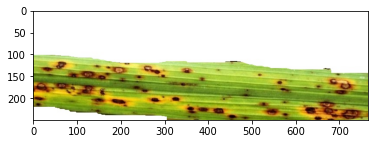

In [9]:

files = fileselect.files[0]
#print("The first file name is: ", files[0])


filename = load_path(files)


img = load_image(filename)
prediction = predict(img)
remedy = remedies[list(prediction.keys())[0]]
print("\n")
print(fontstyle.apply("The diesease detected for the rice crop is  %s with a confidence score of %f%%" % (list(prediction.keys())[0], list(prediction.values())[0]*100),'bold/Italic/green'))
print(fontstyle.apply(remedy,'bold/Italic/CYAN'))